**Бігун М.С. ФІТ 4-7**

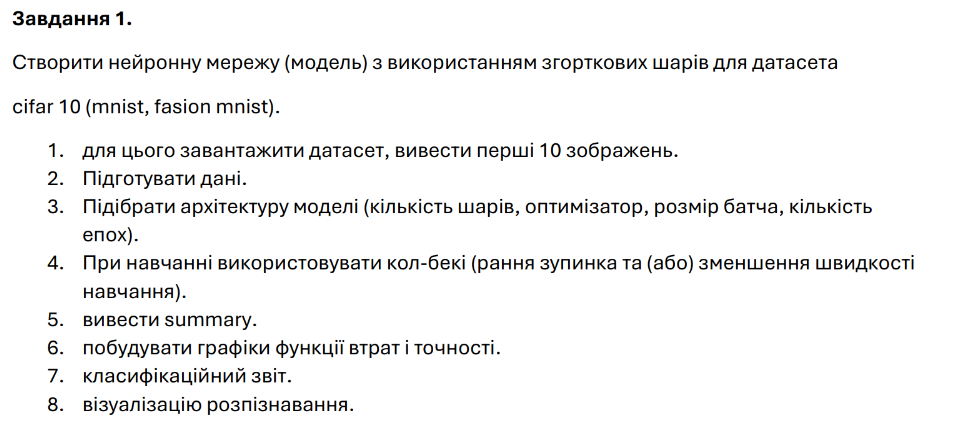

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


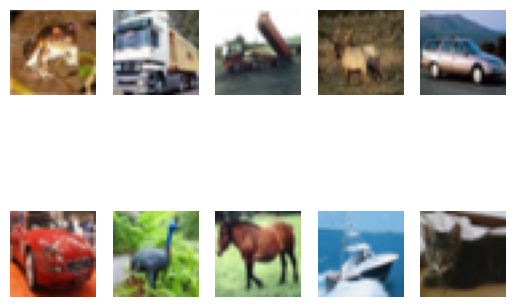

In [3]:
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
    plt.axis('off')
plt.show()

In [4]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [5]:
model = models.Sequential()

In [6]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [8]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [9]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [10]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=2, min_lr=0.001)

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=64,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 83ms/step - accuracy: 0.3336 - loss: 1.8071 - val_accuracy: 0.5188 - val_loss: 1.3219 - learning_rate: 0.0010
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.5519 - loss: 1.2591 - val_accuracy: 0.6032 - val_loss: 1.1260 - learning_rate: 0.0010
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 82ms/step - accuracy: 0.6212 - loss: 1.0792 - val_accuracy: 0.5981 - val_loss: 1.1416 - learning_rate: 0.0010
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 83ms/step - accuracy: 0.6544 - loss: 0.9847 - val_accuracy: 0.6442 - val_loss: 1.0013 - learning_rate: 0.0010
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 81ms/step - accuracy: 0.6827 - loss: 0.9068 - val_accuracy: 0.6741 - val_loss: 0.9271 - learning_rate: 0.0010
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 82ms/step - accuracy: 0.7122 - loss: 0.8237 - val_accuracy: 0.6753 - val_loss: 0.9199 - learning_rate: 0.0010
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 81ms/step - accuracy: 0.7230 - l

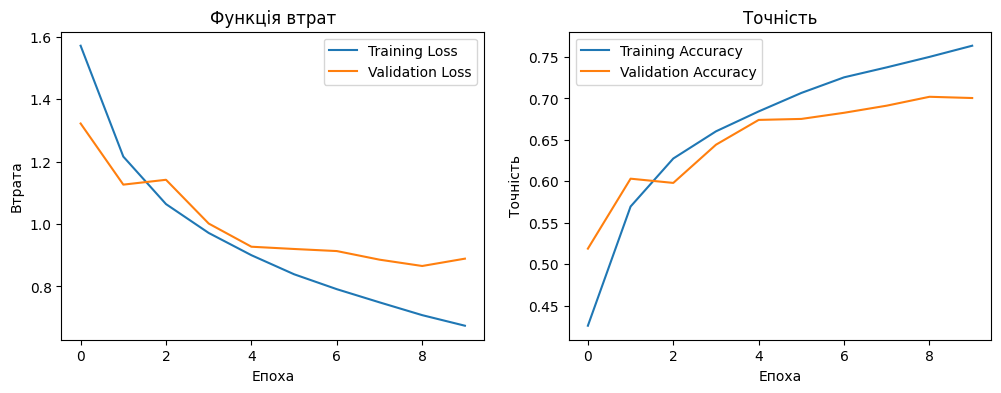

In [13]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Функція втрат')
plt.xlabel('Епоха')
plt.ylabel('Втрата')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Точність')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()

plt.show()

In [14]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step


In [15]:
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76      1000
           1       0.85      0.80      0.83      1000
           2       0.65      0.49      0.56      1000
           3       0.53      0.48      0.50      1000
           4       0.65      0.65      0.65      1000
           5       0.58      0.66      0.61      1000
           6       0.74      0.79      0.76      1000
           7       0.65      0.81      0.72      1000
           8       0.81      0.82      0.81      1000
           9       0.83      0.76      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



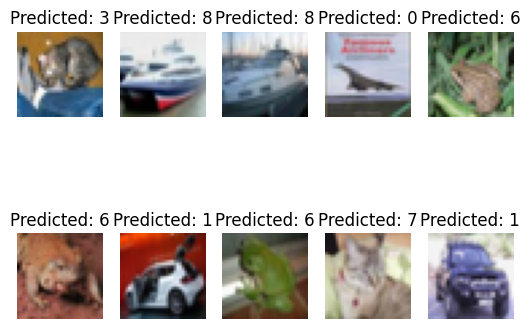

In [16]:
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i])
    plt.title(f"Predicted: {y_pred_classes[i]}")
    plt.axis('off')
plt.show()

**У цьому завданні було створено нейронну мережу з використанням згорткових шарів для класифікації зображень з датасету CIFAR-10. Модель навчалася розпізнавати 10 різних класів зображень, таких як літаки, автомобілі, птахи тощо, і була оцінена за допомогою графіків втрат, точності та класифікаційного звіту. Для покращення процесу навчання використовувалися колбеки, що дозволили зупинити навчання раніше або зменшити швидкість навчання для кращої точності.**

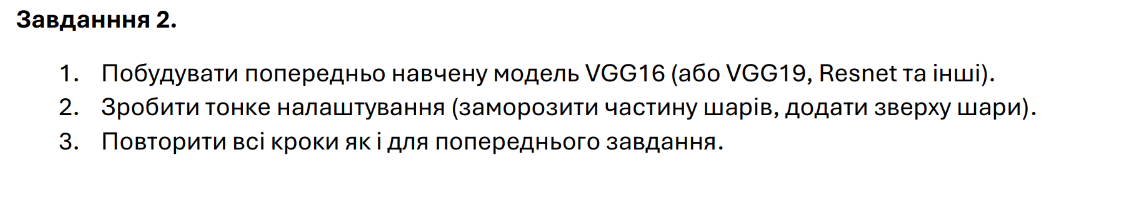

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.applications.vgg16 import preprocess_input

In [2]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [3]:
for layer in base_model.layers:
    layer.trainable = False

In [5]:
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
X_train_resized = np.array([tf.image.resize(img, (224, 224)) for img in X_train])
X_test_resized = np.array([tf.image.resize(img, (224, 224)) for img in X_test])